Steps:
- 1 Confirm that everything workes
 - 1.1 Create Synt hdataset
 - 1.2 Run MM
- 2 Create n randomized datasets
- 3 Run MM for all
- 4 Check the 

In [34]:
%load_ext autoreload
%autoreload 2
import sys
import os
from data.create_subsites_datasets import create_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# Get the current working directory
current_working_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_working_directory)

# Add the parent directory to sys.path
sys.path.append(parent_directory)

# Now you can import your module
# Example: from data.create_subsites_datasets import create_dataset

In [53]:
# Define the graph which we want to use thourgout the notebook:
graph = {
        ("tumor", "primary"): ["I", "II"],
        ("lnl", "I"): [],
        ("lnl", "II"): [],
    }
locations = ["S1", "S2"]

Prev Vector: {'II': False, 'I': False}: 0.388{'II': False, 'I': True}: 0.612{'II': True, 'I': False}: 0.0{'II': True, 'I': True}: 0.0
Prev Vector: {'II': False, 'I': False}: 0.18{'II': False, 'I': True}: 0.0{'II': True, 'I': False}: 0.82{'II': True, 'I': True}: 0.0


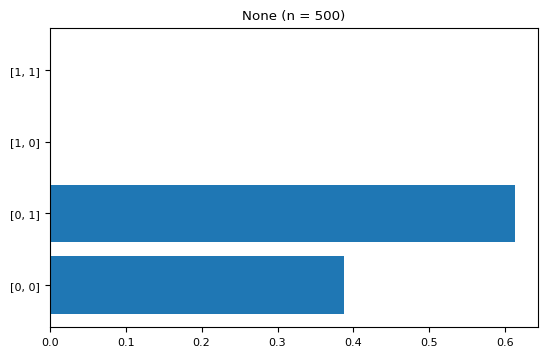

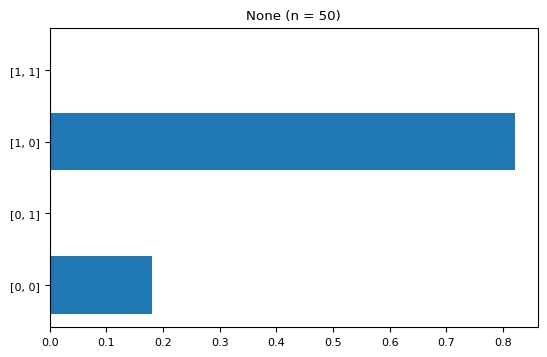

In [60]:



config = {
    "name": "test_01",
    "n": [500, 50],
    "params": [
        [0.3, 0.0],
        [0.0, 0.6],

    ],
    "locations": locations,
    "t_dist": {"early": 1, "late": 0},
    "graph": graph,
}

df = create_dataset(**config, save_dataset=False)

In [61]:
loc_to_mask = {
        loc: df["tumor"]["1"]["location"] == loc for loc in locations
    }

In [62]:

from core.util_2 import create_models


N_CLUSTERS = 2
N_SUBSITES = len(locations)

models_MM = create_models(
    N_SUBSITES,
    graph,
    ignore_t_stage=True,
    n_mixture_components=N_CLUSTERS,
)
convert_t_stage = {0: "all", 1: "all", 2: "all", 3: "all", 4: "all"}
for i, (k, v) in enumerate(loc_to_mask.items()):
    models_MM[i].load_patient_data(df[v],mapping=lambda x: convert_t_stage[x])
    # logger.info(f"Loaded patients for ICD {k} (total {v.sum()} patients)")

In [88]:

from pathlib import Path
from core.mixture_model import LymphMixtureModel

LMM = LymphMixtureModel(
    models_MM,
    n_clusters=N_CLUSTERS,
    base_dir=Path("mm_models/inbalanced/"),
    name="test",
    model_labels=locations,
)

# The current config, is really only for debugging.
em_config = {
    "max_steps": 10,
    "method": "Default",
    "convergence_ths": 0.015,
    "sampling_params": {
        "params_for_expectation": {
            "walkers_per_dim": 20,
            "nsteps": 15,
            "nburnin": 15,
            "sampler": "SIMPLE",
            "show_sampling_progress": False
        },
        "params_for_maximation": {"minimize_method": "SLSQP"},
    },
}

mcmc_config = {
    "sampler": "PRO",
    "sampling_params": {
        "walkers_per_dim": 20,
        "nsteps": 50,
        "nburnin": 100,
    },
}

# Enable EM Sampling by uncommenting this line.

# LMM.cluster_assignments = [0.35, 0.12, 0.19, 0.4, 0.21, 0.89, 0.81, 0.67]

# Run the EM algorithm and sample from the found cluster assignmnet
LMM.fit(em_config=em_config, mcmc_config=None, do_plot_history=True)

# LMM.plot_cluster_parameters()

LMM.plot_cluster_assignment_matrix(labels=locations)

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 27 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/test


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.31 1.   0.03 0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 45.50 % of samples.
    Proposal Params Exp: [0.29 0.82]
Performing maximization: 
    Maximation Suggests: [1.   0.42 0.   0.02]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 47.17 % of samples.
    Proposal Params Exp: [0.5  0.39]
Performing maximization: 
    Maximation Suggests: [0.32 1.   0.03 0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 47.50 % of samples.
    Proposal Params Exp: [0.32 0.81]
Performing maximization: 
    Maximation Suggests: [0.16 1.   0.06 0.  ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 56.17 % of sample

KeyboardInterrupt: 

In [72]:
# 
import numpy as np


n_patients_1 = np.arange(2, 30, 5)

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 10 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_10


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.36 1.   0.01 0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 38.76it/s]


Accepted 54.42 % of samples.
    Proposal Params Exp: [0.39 0.79]
Performing maximization: 
    Maximation Suggests: [0.29 1.   0.01 0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 38.60it/s]


Accepted 66.33 % of samples.
    Proposal Params Exp: [0.3 0.9]
Performing maximization: 
    Maximation Suggests: [0.21 1.   0.02 0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 44.49it/s]

Accepted 64.00 % of samples.
    Proposal Params Exp: [0.24 0.91]
Performing maximization: 
    Maximation Suggests: [1. 1. 0. 0.]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler



100%|██████████| 30/30 [00:00<00:00, 34.61it/s]


Accepted 68.17 % of samples.
    Proposal Params Exp: [0.33 0.9 ]
Performing maximization: 
    Maximation Suggests: [0.36 1.   0.01 0.  ]
Step 5 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 44.79it/s]


Accepted 62.83 % of samples.
    Proposal Params Exp: [0.38 0.9 ]
Performing maximization: 
    Maximation Suggests: [0.23 1.   0.02 0.  ]
Step 6 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 45.02it/s]


Accepted 60.92 % of samples.
    Proposal Params Exp: [0.27 0.86]
Performing maximization: 
    Maximation Suggests: [0.15 1.   0.02 0.  ]
Step 7 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 32.65it/s]


Accepted 61.75 % of samples.
    Proposal Params Exp: [0.21 0.87]
Performing maximization: 
    Maximation Suggests: [0.11 1.   0.03 0.  ]
Step 8 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:01<00:00, 20.59it/s]


Accepted 63.08 % of samples.
    Proposal Params Exp: [0.18 0.9 ]
Performing maximization: 
    Maximation Suggests: [1. 1. 0. 0.]
Step 9 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 39.64it/s]


Accepted 64.75 % of samples.
    Proposal Params Exp: [0.2  0.89]
Performing maximization: 
    Maximation Suggests: [1. 1. 0. 0.]


INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 30 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_30


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.31 1.   0.04 0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 37.28it/s]


Accepted 45.17 % of samples.
    Proposal Params Exp: [0.28 0.82]
Performing maximization: 
    Maximation Suggests: [0.09 1.   0.08 0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 38.31it/s]


Accepted 51.42 % of samples.
    Proposal Params Exp: [0.15 0.9 ]
Performing maximization: 
    Maximation Suggests: [0.   1.   0.13 0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 40.70it/s]


Accepted 62.08 % of samples.
    Proposal Params Exp: [0.1  0.95]
Performing maximization: 
    Maximation Suggests: [0.   0.75 0.2  0.  ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 41.19it/s]


Accepted 58.17 % of samples.
    Proposal Params Exp: [0.04 0.94]
Performing maximization: 
    Maximation Suggests: [0.   0.64 0.41 0.  ]
Step 5 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 36.42it/s]


Accepted 51.25 % of samples.
    Proposal Params Exp: [0.01 0.93]
Performing maximization: 
    Maximation Suggests: [0.   0.61 0.63 0.  ]
Step 6 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 35.02it/s]


Accepted 51.00 % of samples.
    Proposal Params Exp: [0.   0.95]
Performing maximization: 
    Maximation Suggests: [0.   0.61 0.7  0.  ]
Step 7 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:01<00:00, 28.55it/s]


Accepted 57.67 % of samples.
    Proposal Params Exp: [0.   0.96]
Performing maximization: 
    Maximation Suggests: [0.   0.61 0.69 0.  ]
Step 8 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 40.05it/s]


Accepted 58.17 % of samples.
    Proposal Params Exp: [0.   0.96]
Performing maximization: 
    Maximation Suggests: [0.   0.61 0.69 0.  ]
Condition Fullfilled at step 8


INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 50 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_50


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.25 1.   0.06 0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 45.29it/s]


Accepted 40.75 % of samples.
    Proposal Params Exp: [0.25 0.79]
Performing maximization: 
    Maximation Suggests: [0.   1.   0.17 0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 45.25it/s]


Accepted 49.25 % of samples.
    Proposal Params Exp: [0.1  0.95]
Performing maximization: 
    Maximation Suggests: [0.   0.74 0.28 0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 47.73it/s]


Accepted 47.67 % of samples.
    Proposal Params Exp: [0.03 0.95]
Performing maximization: 
    Maximation Suggests: [0.   0.64 0.49 0.  ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 49.39it/s]


Accepted 47.92 % of samples.
    Proposal Params Exp: [0.01 0.97]
Performing maximization: 
    Maximation Suggests: [0.   0.63 0.55 0.  ]
Step 5 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 46.69it/s]


Accepted 57.17 % of samples.
    Proposal Params Exp: [0.   0.97]
Performing maximization: 
    Maximation Suggests: [0.   0.63 0.54 0.  ]
Step 6 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 36.96it/s]


Accepted 61.42 % of samples.
    Proposal Params Exp: [0.   0.98]
Performing maximization: 
    Maximation Suggests: [0.   0.63 0.55 0.  ]
Condition Fullfilled at step 6


INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 70 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_70


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.19 1.   0.1  0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 38.41it/s]


Accepted 42.08 % of samples.
    Proposal Params Exp: [0.22 0.81]
Performing maximization: 
    Maximation Suggests: [0.   1.   0.23 0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 33.21it/s]


Accepted 50.25 % of samples.
    Proposal Params Exp: [0.08 0.96]
Performing maximization: 
    Maximation Suggests: [0.   0.69 0.44 0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 35.73it/s]


Accepted 47.92 % of samples.
    Proposal Params Exp: [0.02 0.96]
Performing maximization: 
    Maximation Suggests: [0.   0.65 0.59 0.  ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 33.42it/s]


Accepted 54.50 % of samples.
    Proposal Params Exp: [0.01 0.98]
Performing maximization: 
    Maximation Suggests: [0.   0.64 0.62 0.  ]
Step 5 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 35.91it/s]


Accepted 60.75 % of samples.
    Proposal Params Exp: [0.   0.98]
Performing maximization: 
    Maximation Suggests: [0.   0.64 0.61 0.  ]
Step 6 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 46.30it/s]


Accepted 65.17 % of samples.
    Proposal Params Exp: [0.   0.99]
Performing maximization: 
    Maximation Suggests: [0.   0.64 0.61 0.  ]
Condition Fullfilled at step 6


INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 90 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_90


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.11 1.   0.14 0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 38.93it/s]


Accepted 41.50 % of samples.
    Proposal Params Exp: [0.15 0.85]
Performing maximization: 
    Maximation Suggests: [0.   0.72 0.34 0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 44.29it/s]


Accepted 48.17 % of samples.
    Proposal Params Exp: [0.04 0.95]
Performing maximization: 
    Maximation Suggests: [0.   0.61 0.57 0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 42.82it/s]


Accepted 47.58 % of samples.
    Proposal Params Exp: [0.01 0.97]
Performing maximization: 
    Maximation Suggests: [0.   0.6  0.61 0.  ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 42.91it/s]


Accepted 59.33 % of samples.
    Proposal Params Exp: [0.   0.98]
Performing maximization: 
    Maximation Suggests: [0.   0.6  0.61 0.  ]
Step 5 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler


100%|██████████| 30/30 [00:00<00:00, 41.18it/s]


Accepted 60.33 % of samples.
    Proposal Params Exp: [0.   0.99]
Performing maximization: 
    Maximation Suggests: [0.   0.6  0.61 0.  ]
Condition Fullfilled at step 5


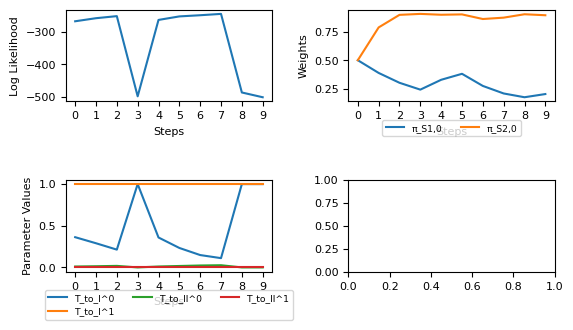

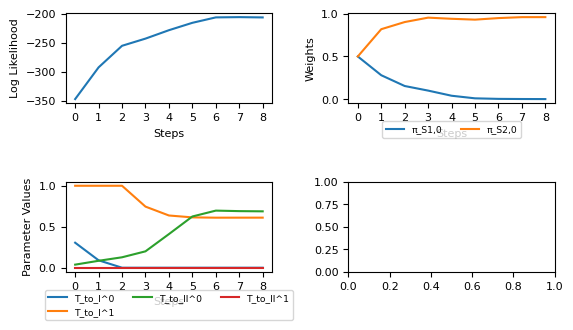

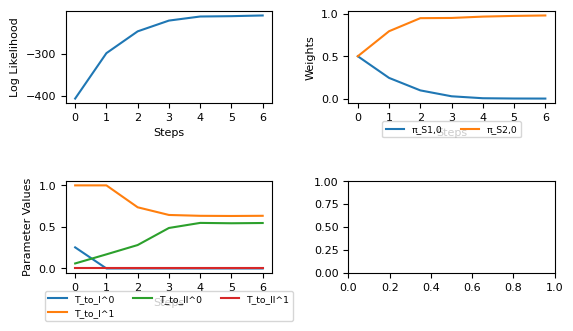

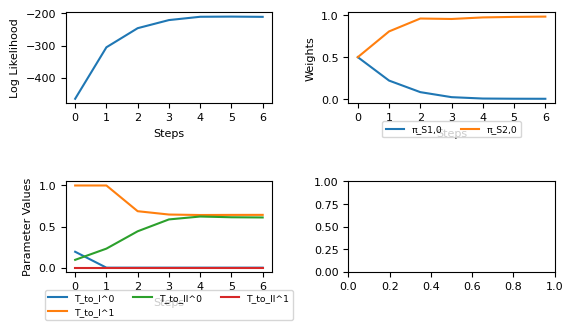

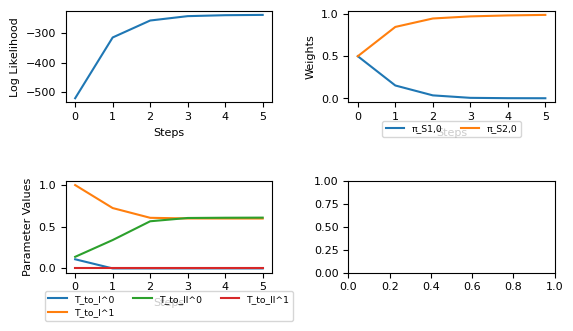

In [76]:
# definitions:
convert_t_stage = {0: "all", 1: "all", 2: "all", 3: "all", 4: "all"}
N_CLUSTERS = 2
N_SUBSITES = len(locations)


assignment_inb_cluster = []

for n_pat in n_patients_1:
    name = f"inbalanced_n_{n_pat}"
    n = [500, n_pat]
    params = [
        [0.6, 0.0],
        [0.0, 0.6],
    ]
    t_dist = {"early": 1, "late": 0}

    df = create_dataset(graph, n, params, locations, t_dist, name, save_dataset=False, plot=False)
    loc_to_mask = {
        loc: df["tumor"]["1"]["location"] == loc for loc in locations
    }

    models_MM = create_models(
    N_SUBSITES,
    graph,
    ignore_t_stage=True,
    n_mixture_components=N_CLUSTERS,
    )
    
    for i, (k, v) in enumerate(loc_to_mask.items()):
        models_MM[i].load_patient_data(df[v],mapping=lambda x: convert_t_stage[x])
    
    LMM = LymphMixtureModel(
    models_MM,
    n_clusters=N_CLUSTERS,
    base_dir=Path("mm_models/inbalanced/"),
    name=name,
    model_labels=locations,
    )
    LMM.fit(em_config=em_config, mcmc_config=None, do_plot_history=False)

    assignment_inb_cluster.append(LMM.cluster_assignments_full_matrix)


In [77]:
assignment_inb_cluster

[array([[0.13254645, 0.94316363],
        [0.86745355, 0.05683637]]),
 array([[0.00187405, 0.96855107],
        [0.99812595, 0.03144893]]),
 array([[0.00521512, 0.99155382],
        [0.99478488, 0.00844618]]),
 array([[0.00464206, 0.99643792],
        [0.99535794, 0.00356208]]),
 array([[0.00119367, 0.98950403],
        [0.99880633, 0.01049597]])]

Text(0, 0.5, 'Cluster Assignmnrt')

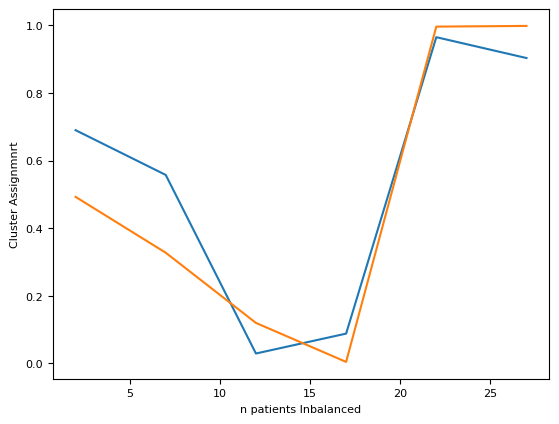

In [85]:
from matplotlib import pyplot as plt


fig,ax = plt.subplots(1)
ax.plot(n_patients_1, [ca[0,1] for ca in assignment_inb_cluster ], label='inbalanced S2')
ax.plot(n_patients_1, [ca[1,0] for ca in assignment_inb_cluster ], label='fixed S1')
ax.set_xlabel("n patients Inbalanced")
ax.set_ylabel("Cluster Assignmnrt")

In [80]:
assignment_inb_cluster[0][1,0]

0.8674535487785437

In [117]:
import numpy as np


em_config = {
    "max_steps": 30,
    "method": "Default",
    "convergence_ths": 0.015,
    "sampling_params": {
        "params_for_expectation": {
            "walkers_per_dim": 20,
            "nsteps": 15,
            "nburnin": 15,
            "sampler": "SIMPLE",
            "show_sampling_progress": False
        },
        "params_for_maximation": {"minimize_method": "SLSQP"},
    },
}

mcmc_config = {
    "sampler": "PRO",
    "sampling_params": {
        "walkers_per_dim": 20,
        "nsteps": 50,
        "nburnin": 100,
    },
}

n_patients_1 = [2,3,5,10,20,40,75,100]

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 2 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_2


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.48 1.   0.   0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 63.25 % of samples.
    Proposal Params Exp: [0.45 0.69]
Performing maximization: 
    Maximation Suggests: [0.45 1.   0.   0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 70.33 % of samples.
    Proposal Params Exp: [0.4  0.78]
Performing maximization: 
    Maximation Suggests: [1.   0.53 0.   0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 67.42 % of samples.
    Proposal Params Exp: [0.43 0.41]
Performing maximization: 
    Maximation Suggests: [0.44 1.   0.   0.  ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 63.75 % of sample

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 3 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_3


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.44 1.   0.   0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 60.92 % of samples.
    Proposal Params Exp: [0.45 0.67]
Performing maximization: 
    Maximation Suggests: [1.   0.47 0.   0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 64.50 % of samples.
    Proposal Params Exp: [0.48 0.33]
Performing maximization: 
    Maximation Suggests: [1.   0.45 0.   0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 66.25 % of samples.
    Proposal Params Exp: [0.52 0.23]
Performing maximization: 
    Maximation Suggests: [1.   0.43 0.   0.  ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 64.75 % of sample

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 5 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_5


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.46 1.   0.01 0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 61.42 % of samples.
    Proposal Params Exp: [0.44 0.78]
Performing maximization: 
    Maximation Suggests: [1.   0.49 0.   0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 62.17 % of samples.
    Proposal Params Exp: [0.5  0.38]
Performing maximization: 
    Maximation Suggests: [1.   0.45 0.   0.01]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 64.25 % of samples.
    Proposal Params Exp: [0.59 0.15]
Performing maximization: 
    Maximation Suggests: [1.   0.4  0.   0.01]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 66.67 % of sample

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 10 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_10


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [1.   0.37 0.   0.01]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 53.83 % of samples.
    Proposal Params Exp: [0.61 0.25]
Performing maximization: 
    Maximation Suggests: [1.   0.3  0.   0.01]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 60.75 % of samples.
    Proposal Params Exp: [0.7  0.11]
Performing maximization: 
    Maximation Suggests: [1.   0.22 0.   0.02]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 64.25 % of samples.
    Proposal Params Exp: [0.76 0.09]
Performing maximization: 
    Maximation Suggests: [1.   0.15 0.   0.02]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 65.67 % of sample

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 20 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_20


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.3  1.   0.03 0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 50.50 % of samples.
    Proposal Params Exp: [0.33 0.84]
Performing maximization: 
    Maximation Suggests: [0.16 1.   0.04 0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 58.25 % of samples.
    Proposal Params Exp: [0.23 0.92]
Performing maximization: 
    Maximation Suggests: [0.02 1.   0.07 0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 57.08 % of samples.
    Proposal Params Exp: [0.15 0.92]
Performing maximization: 
    Maximation Suggests: [0.9 1.  0.  0. ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 51.75 % of samples.
 

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 40 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_40


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [1.   0.25 0.   0.05]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 44.58 % of samples.
    Proposal Params Exp: [0.74 0.17]
Performing maximization: 
    Maximation Suggests: [1.   0.   0.   0.13]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 51.58 % of samples.
    Proposal Params Exp: [0.85 0.07]
Performing maximization: 
    Maximation Suggests: [0.84 0.   0.   0.16]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 59.75 % of samples.
    Proposal Params Exp: [0.92 0.06]
Performing maximization: 
    Maximation Suggests: [0.64 0.   0.   0.28]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 50.25 % of sample

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 75 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_75


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [1.   0.15 0.   0.1 ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 42.33 % of samples.
    Proposal Params Exp: [0.78 0.22]
Performing maximization: 
    Maximation Suggests: [1.  0.  0.  0.2]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 52.08 % of samples.
    Proposal Params Exp: [0.88 0.05]
Performing maximization: 
    Maximation Suggests: [0.66 0.   0.   0.35]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 50.08 % of samples.
    Proposal Params Exp: [0.97 0.04]
Performing maximization: 
    Maximation Suggests: [0.59 0.   0.   0.54]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 57.00 % of samples.
 

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 100 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_100


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [1.   0.09 0.   0.16]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 43.67 % of samples.
    Proposal Params Exp: [0.85 0.18]
Performing maximization: 
    Maximation Suggests: [0.77 0.   0.   0.36]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 47.33 % of samples.
    Proposal Params Exp: [0.97 0.04]
Performing maximization: 
    Maximation Suggests: [0.65 0.   0.   0.54]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 53.08 % of samples.
    Proposal Params Exp: [0.99 0.02]
Performing maximization: 
    Maximation Suggests: [0.64 0.   0.   0.57]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 59.92 % of sample

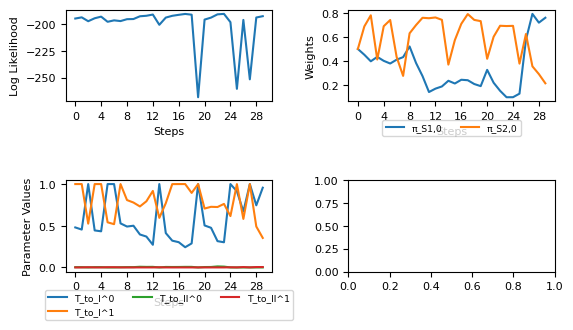

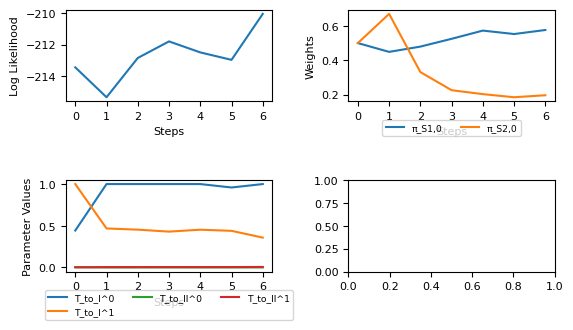

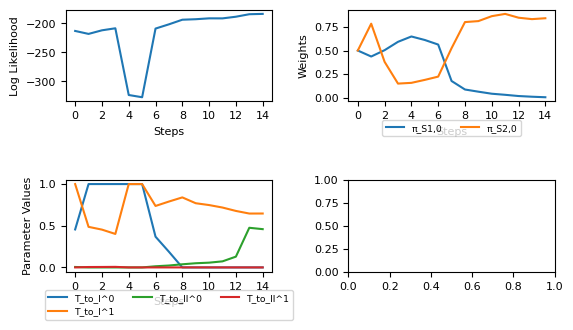

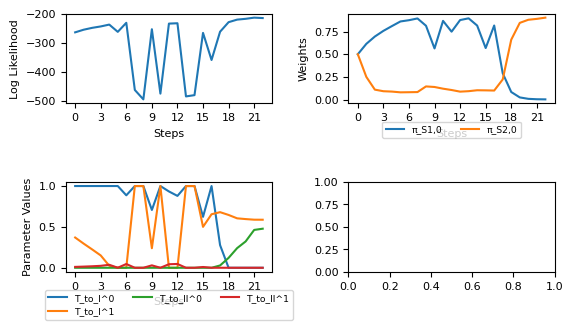

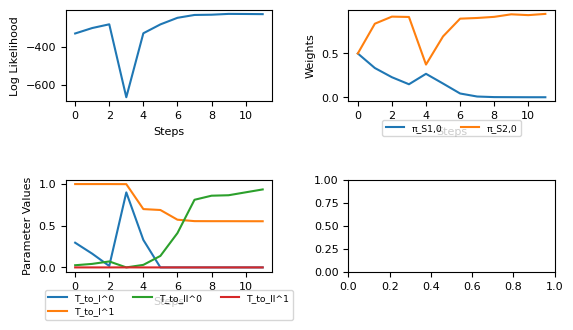

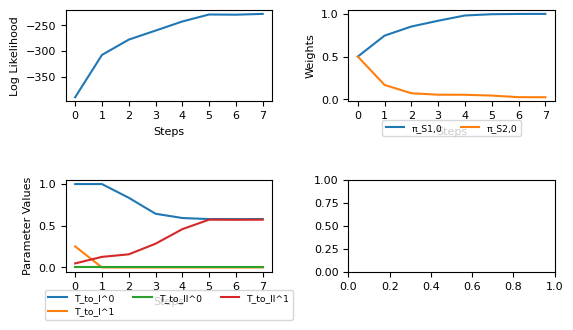

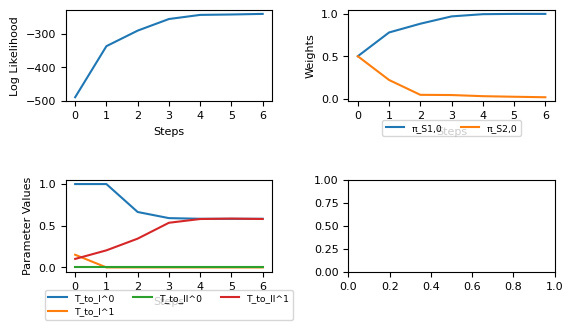

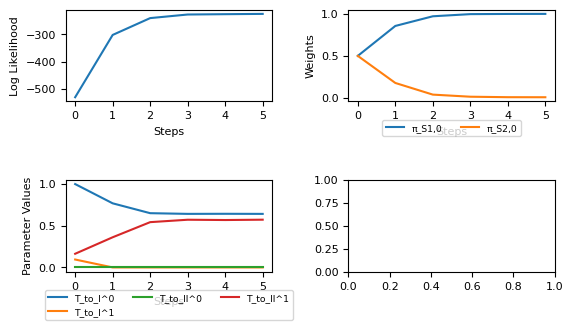

In [118]:
# definitions:
convert_t_stage = {0: "all", 1: "all", 2: "all", 3: "all", 4: "all"}
N_CLUSTERS = 2
N_SUBSITES = len(locations)


assignment_inb_cluster = {}

for n_pat in n_patients_1:
    name = f"inbalanced_n_{n_pat}"
    n = [500, n_pat]
    params = [
        [0.6, 0.0],
        [0.0, 0.6],
    ]
    t_dist = {"early": 1, "late": 0}

    df = create_dataset(graph, n, params, locations, t_dist, name, save_dataset=False, plot=False)
    loc_to_mask = {
        loc: df["tumor"]["1"]["location"] == loc for loc in locations
    }

    models_MM = create_models(
    N_SUBSITES,
    graph,
    ignore_t_stage=True,
    n_mixture_components=N_CLUSTERS,
    )
    
    for i, (k, v) in enumerate(loc_to_mask.items()):
        models_MM[i].load_patient_data(df[v],mapping=lambda x: convert_t_stage[x])
    
    LMM = LymphMixtureModel(
    models_MM,
    n_clusters=N_CLUSTERS,
    base_dir=Path("mm_models/inbalanced/"),
    name=name,
    model_labels=locations,
    )
    LMM.fit(em_config=em_config, mcmc_config=None, do_plot_history=False)

    assignment_inb_cluster[n_pat] = LMM.cluster_assignments_full_matrix


In [121]:
assignment_inb_cluster

{2: array([[0.70909814, 0.24956365],
        [0.29090186, 0.75043635]]),
 3: array([[0.63905797, 0.12055435],
        [0.36094203, 0.87944565]]),
 5: array([[0.00218525, 0.8709814 ],
        [0.99781475, 0.1290186 ]]),
 10: array([[0.00407268, 0.82473244],
        [0.99592732, 0.17526756]]),
 20: array([[0.00224125, 0.90152155],
        [0.99775875, 0.09847845]]),
 40: array([[0.99846311, 0.00642231],
        [0.00153689, 0.99357769]]),
 75: array([[0.99818251, 0.00681107],
        [0.00181749, 0.99318893]]),
 100: array([[0.99665785, 0.00324783],
        [0.00334215, 0.99675217]])}

Text(0, 0.5, 'Cluster Assignmnrt')

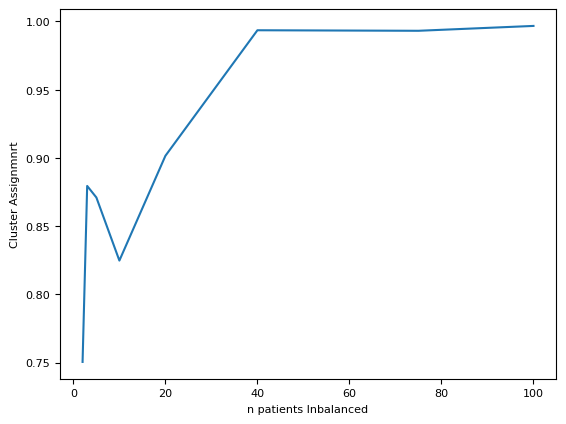

In [122]:
from matplotlib import pyplot as plt


fig,ax = plt.subplots(1)
ax.plot(assignment_inb_cluster.keys(), [max(ca[:, 1]) for ca in list(assignment_inb_cluster.values()) ], label='inbalanced S2')
# ax.plot(pat_ca.keys(), [max(ca[:, 0]) for ca in list(pat_ca.values()) ], label='fixed S1')
ax.set_xlabel("n patients Inbalanced")
ax.set_ylabel("Cluster Assignmnrt")

In [123]:
assignment_inb_cluster

{2: array([[0.70909814, 0.24956365],
        [0.29090186, 0.75043635]]),
 3: array([[0.63905797, 0.12055435],
        [0.36094203, 0.87944565]]),
 5: array([[0.00218525, 0.8709814 ],
        [0.99781475, 0.1290186 ]]),
 10: array([[0.00407268, 0.82473244],
        [0.99592732, 0.17526756]]),
 20: array([[0.00224125, 0.90152155],
        [0.99775875, 0.09847845]]),
 40: array([[0.99846311, 0.00642231],
        [0.00153689, 0.99357769]]),
 75: array([[0.99818251, 0.00681107],
        [0.00181749, 0.99318893]]),
 100: array([[0.99665785, 0.00324783],
        [0.00334215, 0.99675217]])}

In [129]:
df = {k:max(v[:, 1])for k,v in assignment_inb_cluster.items()}

In [132]:
df

{2: 0.7504363531824503,
 3: 0.8794456450323025,
 5: 0.8709814036833619,
 10: 0.8247324365979806,
 20: 0.9015215506453368,
 40: 0.9935776924280177,
 75: 0.9931889349448773,
 100: 0.9967521705269556}

In [138]:
import pandas as pd

pd.DataFrame([[df.keys()], [df.items()]], index =range(len(df)), columns = ["n Patients", "Max Cluster assignments"])

ValueError: 2 columns passed, passed data had 1 columns

In [108]:
pat_ca = {n: max(assignment_inb_cluster[i][:, 0]) for i, n in enumerate(n_patients_1)}
pat_ca

{2: 0.668912328309159,
 7: 0.864459587348708,
 12: 0.9929695099723048,
 17: 0.9667491973705818,
 22: 0.9923496761050518,
 27: 0.9977190000486872}

In [ ]:
# Try with even more patients

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 50 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_50


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [1.   0.27 0.   0.06]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 43.75 % of samples.
    Proposal Params Exp: [0.77 0.18]
Performing maximization: 
    Maximation Suggests: [1.   0.   0.   0.18]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 49.00 % of samples.
    Proposal Params Exp: [0.92 0.07]
Performing maximization: 
    Maximation Suggests: [0.76 0.   0.   0.3 ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 50.33 % of samples.
    Proposal Params Exp: [0.98 0.06]
Performing maximization: 
    Maximation Suggests: [0.68 0.   0.   0.47]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 53.42 % of sample

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 70 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_70


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [1.   0.22 0.   0.09]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 40.00 % of samples.
    Proposal Params Exp: [0.82 0.17]
Performing maximization: 
    Maximation Suggests: [1.   0.   0.   0.27]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 50.75 % of samples.
    Proposal Params Exp: [0.95 0.04]
Performing maximization: 
    Maximation Suggests: [0.72 0.   0.   0.51]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 51.75 % of samples.
    Proposal Params Exp: [0.99 0.03]
Performing maximization: 
    Maximation Suggests: [0.69 0.   0.   0.6 ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 59.42 % of sample

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 90 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_90


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [1.   0.1  0.   0.14]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 41.58 % of samples.
    Proposal Params Exp: [0.82 0.16]
Performing maximization: 
    Maximation Suggests: [0.76 0.   0.   0.28]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 49.67 % of samples.
    Proposal Params Exp: [0.94 0.05]
Performing maximization: 
    Maximation Suggests: [0.9 0.  0.  0. ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 55.67 % of samples.
    Proposal Params Exp: [0.9  0.03]
Performing maximization: 
    Maximation Suggests: [0.62 0.   0.   0.43]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 50.08 % of samples.
 

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 110 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_110


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [1.   0.   0.   0.23]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 39.42 % of samples.
    Proposal Params Exp: [0.8  0.23]
Performing maximization: 
    Maximation Suggests: [0.78 0.   0.   0.3 ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 45.08 % of samples.
    Proposal Params Exp: [0.95 0.05]
Performing maximization: 
    Maximation Suggests: [0.59 0.   0.   0.51]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 47.33 % of samples.
    Proposal Params Exp: [0.99 0.03]
Performing maximization: 
    Maximation Suggests: [0.58 0.   0.   0.56]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 58.83 % of sample

INFO:core.mixture_model:Assigned S1 to lymph model with 500 patients
INFO:core.mixture_model:Assigned S2 to lymph model with 130 patients
INFO:core.mixture_model:Create LymphMixtureModel with 2 models and 2 cluster components in mm_models/inbalanced/inbalanced_n_130


Step 0 - - - - - - - - - - - - - - - - - - - - 
Performing maximization: 
    Maximation Suggests: [0.   1.   0.26 0.  ]
Step 1 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 40.92 % of samples.
    Proposal Params Exp: [0.15 0.83]
Performing maximization: 
    Maximation Suggests: [0.   0.73 0.36 0.  ]
Step 2 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 41.08 % of samples.
    Proposal Params Exp: [0.03 0.97]
Performing maximization: 
    Maximation Suggests: [0.   0.62 0.5  0.  ]
Step 3 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 53.83 % of samples.
    Proposal Params Exp: [0.01 0.99]
Performing maximization: 
    Maximation Suggests: [0.   0.62 0.52 0.  ]
Step 4 - - - - - - - - - - - - - - - - - - - - 
Perform expectation step with method: Default
Simple Sampler
Accepted 63.42 % of sample

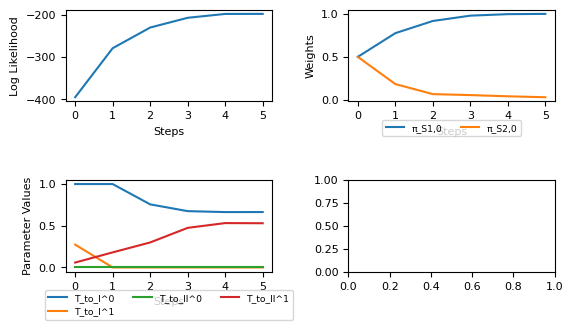

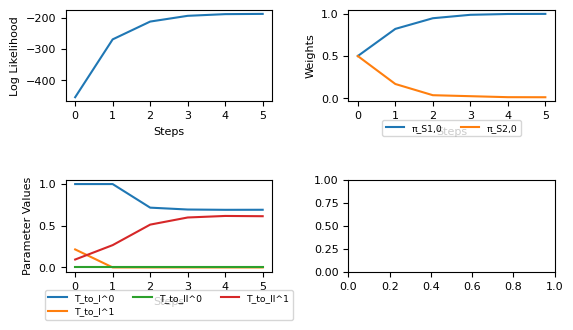

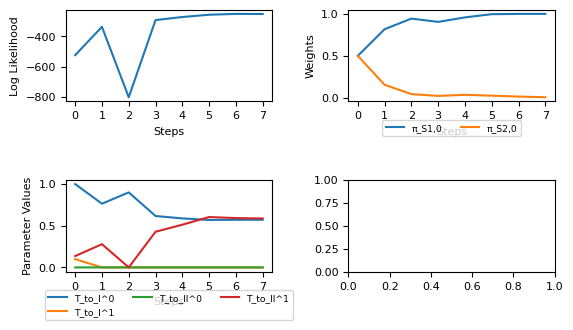

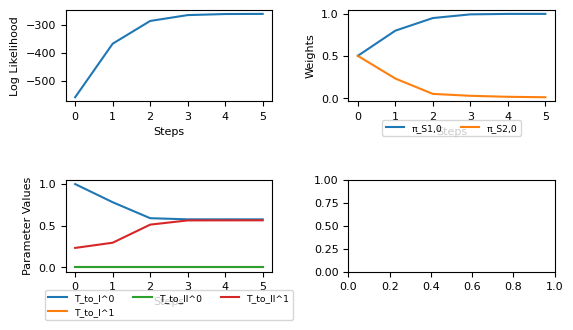

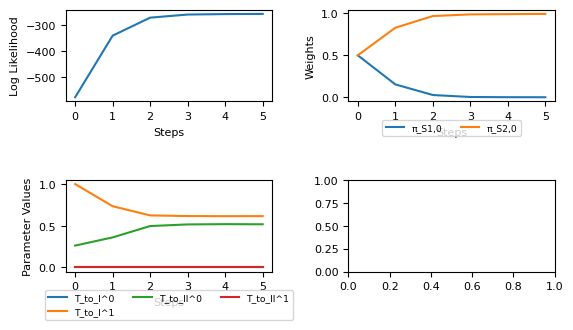

In [109]:
n_patients_1 = np.arange(50, 150, 20)


# definitions:
convert_t_stage = {0: "all", 1: "all", 2: "all", 3: "all", 4: "all"}
N_CLUSTERS = 2
N_SUBSITES = len(locations)


assignment_inb_cluster_more_pat = []

for n_pat in n_patients_1:
    name = f"inbalanced_n_{n_pat}"
    n = [500, n_pat]
    params = [
        [0.6, 0.0],
        [0.0, 0.6],
    ]
    t_dist = {"early": 1, "late": 0}

    df = create_dataset(graph, n, params, locations, t_dist, name, save_dataset=False, plot=False)
    loc_to_mask = {
        loc: df["tumor"]["1"]["location"] == loc for loc in locations
    }

    models_MM = create_models(
    N_SUBSITES,
    graph,
    ignore_t_stage=True,
    n_mixture_components=N_CLUSTERS,
    )
    
    for i, (k, v) in enumerate(loc_to_mask.items()):
        models_MM[i].load_patient_data(df[v],mapping=lambda x: convert_t_stage[x])
    
    LMM = LymphMixtureModel(
    models_MM,
    n_clusters=N_CLUSTERS,
    base_dir=Path("mm_models/inbalanced/"),
    name=name,
    model_labels=locations,
    )
    LMM.fit(em_config=em_config, mcmc_config=None, do_plot_history=False)

    assignment_inb_cluster_more_pat.append(LMM.cluster_assignments_full_matrix)
    pat_ca[n_pat] = max(LMM.cluster_assignments_full_matrix[:,1])

Text(0, 0.5, 'Cluster Assignmnrt')

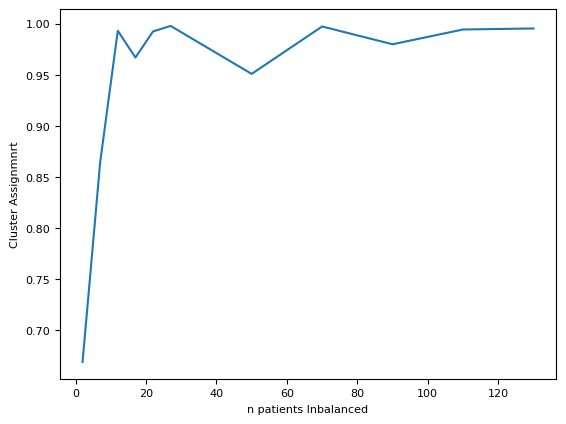

In [113]:
from matplotlib import pyplot as plt


fig,ax = plt.subplots(1)
ax.plot(pat_ca.keys(), [ca for ca in list(pat_ca.values()) ], label='inbalanced S2')
# ax.plot(pat_ca.keys(), [max(ca[:, 0]) for ca in list(pat_ca.values()) ], label='fixed S1')
ax.set_xlabel("n patients Inbalanced")
ax.set_ylabel("Cluster Assignmnrt")

In [112]:
list(pat_ca.values())

[0.668912328309159,
 0.864459587348708,
 0.9929695099723048,
 0.9667491973705818,
 0.9923496761050518,
 0.9977190000486872,
 0.9507771284462564,
 0.9971675788537292,
 0.9797692630831683,
 0.9942247481900259,
 0.9952314153330613]

In [114]:
pat_ca

[autoreload of core.mm_plotting failed: Traceback (most recent call last):
  File "/Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/juli/Studium/Master/FS23/masterthesis/code/lysubsite/core/mm_plotting.py", line 4, in <module>
 

{2: 0.668912328309159,
 7: 0.864459587348708,
 12: 0.9929695099723048,
 17: 0.9667491973705818,
 22: 0.9923496761050518,
 27: 0.9977190000486872,
 50: 0.9507771284462564,
 70: 0.9971675788537292,
 90: 0.9797692630831683,
 110: 0.9942247481900259,
 130: 0.9952314153330613}